# **Wave Equation 2D: Finite Differences Method**

***Code made by Jhonathan Quiroz and Jose Vergara***

In the following code the wave equation in two dimensions with a source is solved. The boundary conditions are Dirichlet type and homogeneous. Let's look at the problem we are solving:

$$\nabla^2u(x,t) - \frac {1}{c^2(x)} \frac{\partial^2 u(x,t)}{\partial t^2} = -g( x,t)$$

Where the Laplacian of $u$ can be write as:

$$\nabla^2 u (x,t) = \frac {\partial u^2}{\partial x^2} + \frac {\partial u^2}{\partial y^2} = U_{xx} + U_{yy}$$

We will assume homogeneous initial conditions and Direchlit Boundary conditions. This is:

> **For y:**
$$u(a,y,t) = p(y,t)$$

$$u(b,y,t) = q(y,t)$$

> **For x:**

$$u(x,c,t) = r(x,t)$$

$$u(x,d,t) = s(x,t)$$

> **Initial Conditions:**

$$u(x,y,t_{0}) = m(x,y)$$

$$u_{t}(x,y,t_{0}) = n(x,y)$$

When working with the wave equation in one dimension, there are two indices $w_{i,j}$ where $i$ refers to space and $j$ refers to time, making it difficult to confuse when discretizing the equation in one dimension. When dealing with two dimensions, a third index appears. To avoid confusion, it is common to represent time as a superscript, as in this case where the equation would be described as $w_{i,j} ^ {k}$. Here, $i$ and $j$ denote the positions $x$ and $y$ in space, respectively, and the index $k$ refers to the times of each iteration. Therefore, we would have:

$$w_{i,j} = u(x_{0} + i Δx, y_{0} + Δy, t_{0} + Δt)$$

There are many methods for solving the two-dimensional wave equation; in this code, it will be solved using the central finite difference method for each of its terms. If we were to write the discretized wave equation using central finite differences, we would have:

$$\frac {w^{k}_{i+1,j} - 2 w^{k}_{i,j} + w^{k}_{i-1,j} }{(Δx)^2} + \frac { w^{k}_{i,j+1} - 2 w^{k}_{i,j} + w^{k}_{i,j-1} }{(Δy)^2} - \frac {1}{c_{i,j}^2} \frac { w^{k+1}_{i,j} - 2 w^{k}_{i,j} + w^{k-1}_{i,j} }{(Δt)^2} = -g^{k}_{i,j}$$


As in the case of the one-dimensional wave equation, this equation is discretized using an explicit method where each time step depends recursively on two previous time steps. The previous equation is multiplied by $-c_{i,j} (Δt)^2$, and it is found that:

$$w^{k+1}_{i,j} = \alpha^{2}_{i,j} (w^{k}_{i+1,j} - 2 w^{k}_{i,j} + w^{k}_{i-1,j}) + \beta^{2}_{i,j} (w^{k}_{i,j+1} - 2 w^{k}_{i,j} + w^{k}_{i,j-1}) + c^{2}_{i,j} Δt^2 g^{2}_{i,j} + 2 w^{k}_{i,j} - w^{k-1}_{i,j}$$


Where:

$$\alpha_{i,j} = \frac {c_{i,j} Δt}{Δx}$$

$$\beta = \frac {c_{i,j} Δt}{Δy}$$

Performing the algebra required for stability analysis leads to the conclusion that:

$$Δt \leq max \frac{1}{c_{i,j} \sqrt{\frac{1}{(Δx)^2} + \frac {1}{(Δy)^2}} }$$

When discretizing the one-dimensional wave equation, we realize that to find the next step, i.e., $w_{i,j+1}$, we need the value of $w$ at the previous step, i.e., $w_{i,j-1}$. This data is essentially impossible to obtain since we do not know the past state of our wave. To address this need, we make an approximation of the time derivative to solve for $w_{i, j-1}$, and we conclude that this value is defined by $w_{i,1} - 2 \Delta t q_{i}$ where $q_{i}$ is the initial velocity of the system, which may be a function depending on space.

In this case, the same thing happens: if we observe the equation we just solved, we will realize that the step $w^{k+1}_{i,j}$ is defined in terms of the step $w^{k-1}_{i,j}$. Therefore, here too, we must approximate this step through the temporal derivative. After the necessary manipulation, we find that this first step, i.e., when $k=0$, is described by:

$$w^{1}_{i,j} = \frac {1}{2} [\alpha^{2}_{i,j} (w^{0}_{i+1,j} + w^{0}_{i-1,j}) + \beta^{2}_{i,j} (w^{0}_{i,j+1} + w^{0}_{i,j-1}) + 2 (1 - \alpha^2_{i,j} - \beta^2_{i,j}) w^{0}_{i,j} + 2 Δt n_{i,j} + c^{2}_{i,j} (Δt)^2 g^{0}_{i,j}]$$

---

Now, we´re ready for start the code!

Let´s see it:

In [3]:
{
 "metadata": {
  "execution": {
      "timeout": 800
  }
}
}

{'metadata': {'execution': {'timeout': 800}}}

In [4]:
{
"metadata": {
  "execution": {
      "allow_errors": False
  }
}
}

{'metadata': {'execution': {'allow_errors': False}}}

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [6]:
def wave2Ds_t(a, b, c, d, v, p, q, r, s, m, n, t0, nx, ny, nt, dt):
  # a: lower limit in x
  # b: upper limit in y
  # c: lower limit in y
  # d: upper limit in y
  # v: wave velocity function(x, y)
  # p: boundary condition at a
  # q: boundary condition at b
  # r: boundary condition at c
  # s: boundary condition at d
  # m: initial condition
  # n: derivative of the initial condition
  # t0: initial time
  # nx: number of partitions in x
  # ny: number of partitions in y
  # nt: number of partitions in t
  # dt: temporal spacing

  # Max Velocity
  x = np.linspace(a, b, nx)
  y = np.linspace(c, d, ny)
  vmax = max( v(posx, posy) for posx, posy in zip(x,y) )

  # We find the size of the box
  Lx = b - a
  Ly = d - c

  # We find dx and dy
  dx = Lx/ (nx-1)
  dy = Ly/ (ny-1)

  # We find constants
  alpha = vmax * dt/dx
  beta = vmax * dt/dy

  # Stability condition
  stab_cond = 1.0

  if alpha >= stab_cond or beta >= stab_cond:
    print("Error: the stability condition was violated")
    print("   alpha = %5.2f and beta = %5.2f" %(alpha,beta))
    print("   it must be less than one")

  # Maximum time
  tmax = nt * dt
  t = np.arange(t0, tmax, dt)

  # Initialize matrix
  w = np.zeros((nx, ny, nt), dtype = float)

  # Initial Conditions
  for i in range(nx):
    for j in range(ny):
      w[i, j, 0] = m(x[i], y[i])

  # Boundary Conditions
  for k in range(nt):
    for j in range(ny):
      w[0, j, k] = p(y[j], t[k])
      w[nx-1, j, k] = q(y[j], t[k])

    for i in range(nx):
      w[i, 0, k] = r(x[i], t[k])
      w[i, ny-1, k] = s(x[i], t[k])

  for k in range(1, nt):
    for i in range(1, nx-1):
      for j in range(1, ny-1):
        if k == 1:
          aux = 0.5
          w_ij_1 = 2.0 * dt * n(x[i], y[j])
        else:
          aux = 1.0
          w_ij_1 = w[i, j, k-2]

        alpha = v(x[i], y[j]) * dt / dx
        beta = v(x[i], y[j]) * dt / dy

        w[i, j, k] = aux * (alpha**2 * (w[i+1, j, k-1] +
                w[i-1, j, k-1]) + beta**2 * (w[i, j+1, k-1] +
                w[i, j-1, k-1]) + 2.0 * (1 - alpha**2 - beta**2) *
                w[i, j, k-1] - w_ij_1 +
                v(x[i], y[j])**2 * dt**2 * g(i, j, t[k]) )
  return w

In [7]:
{
 "metadata": {
  "execution": {
      "timeout": 800
  }
}
}

# Limits in x and y
a = 0.0
b = 1.0 #km

c = 0.0
d = 1.0 #km

# Initial Values
t0 = 0.0
nx = 301
ny = 301
nt = 1001
dt = 0.0005

# Velocity
def v(x,y):
  if x < 0.2:
    return 1.0
  else:
    return 4.0 #km/s

# Boundary Conditions
def p(y,t):
  return 0.0

def q(y,t):
  return 0.0

def r(x,t):
  return 0.0

def s(x,t):
  return 0.0

# Initial Conditions
def m(x,y):
  return 0.0

def n(x,y):
  return 0.0

# Source
def g(i, j, t):
  if i == (nx-1) / 2-1 and j == (ny - 1) / 2-1:
    f = 30.0 #Hz
    return (1.0 - 2.0 *np.pi**2 * f**2 * t**2) * np.exp(-np.pi**2 * f**2 * t**2)
  else:
    return 0
w = wave2Ds_t(a, b, c, d, v, p, q, r, s, m, n, t0, nx, ny, nt, dt)


## **Wavefield snapshots at 100, 200... 800 milliseconds.**

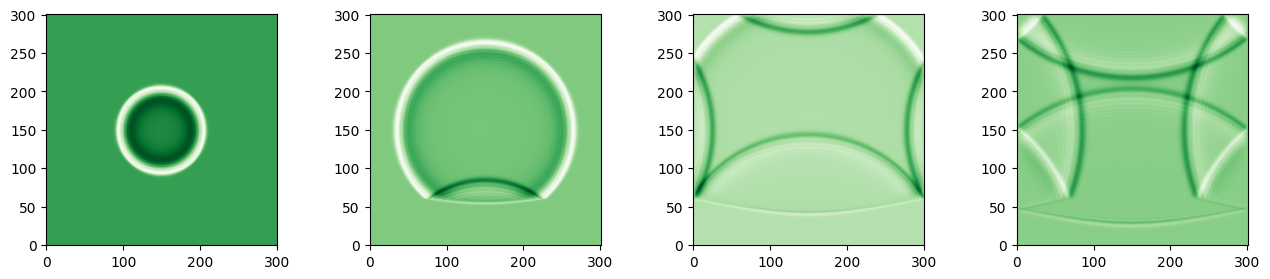

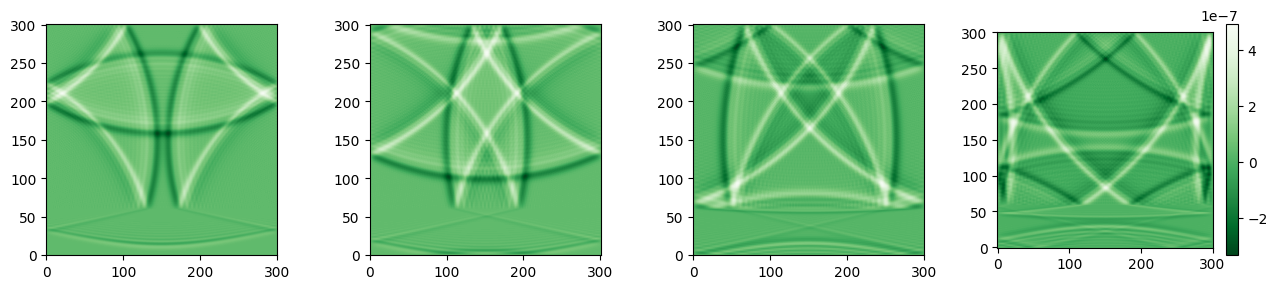

In [8]:
x = np.linspace(a, b, nx)
y = np.linspace(c, d, ny)

w1 = w[:,:,100]
w2 = w[:,:,200]
w3 = w[:,:,300]
w4 = w[:,:,400]


X,Y = np.meshgrid(x,y)
Z1 = w1
Z2 = w2
Z3 = w3
Z4 = w4

# You can place multiple figures side by side. Here's just one
fig,(ax1, ax2, ax3, ax4) = plt.subplots(figsize = (16,3), ncols = 4)

p1 = ax1.imshow(Z1, cmap = plt.cm.Greens_r, origin = "lower")
p2 = ax2.imshow(Z2, cmap = plt.cm.Greens_r, origin = "lower")
p3 = ax3.imshow(Z3, cmap = plt.cm.Greens_r, origin = "lower")
p4 = ax4.imshow(Z4, cmap = plt.cm.Greens_r, origin = "lower")


w1 = w[:,:,500]
w2 = w[:,:,600]
w3 = w[:,:,700]
w4 = w[:,:,800]

X,Y = np.meshgrid(x,y)
Z1 = w1
Z2 = w2
Z3 = w3
Z4 = w4

# You can place multiple figures side by side. Here's just one.
fig,(ax1, ax2, ax3, ax4) = plt.subplots(figsize = (16,3), ncols = 4)

p1 = ax1.imshow(Z1, cmap = plt.cm.Greens_r, origin = "lower")
p2 = ax2.imshow(Z2, cmap = plt.cm.Greens_r, origin = "lower")
p3 = ax3.imshow(Z3, cmap = plt.cm.Greens_r, origin = "lower")
p4 = ax4.imshow(Z4, cmap = plt.cm.Greens_r, origin = "lower")


fig.colorbar(p4, ax=ax4)
plt.show()

## **Density Plot Animations**

It's important to let you know that the animations will be downloaded to your local machine or the cloud where you are running this code. Two animations will be downloaded: the 2D animation of the plots you just saw above and the 3D animation that will be two code blocks below this text.

MovieWriter imagemagick unavailable; using Pillow instead.


Donee


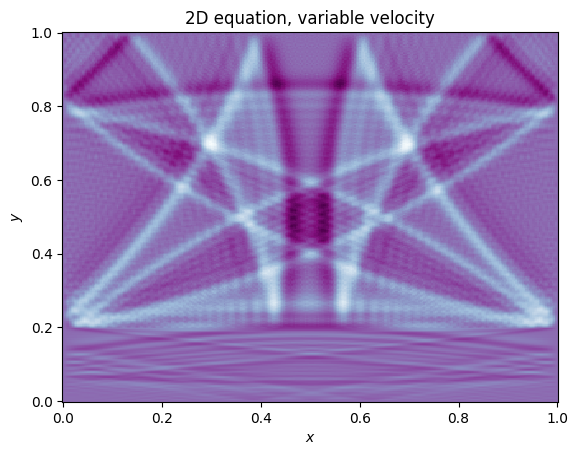

In [9]:
%matplotlib inline

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

A = []
t = []

step = 2
t0 = 0
L = 1.0
Nt = int(nt/step)

for i in range(Nt):
  j = i * step
  value = w[:, :, j]
  t.append(t0)
  t0 += dt * step
  A.append(value)

k = 0
x = np.linspace(a, b, nx)
y = np.linspace(c, d, ny)
X, Y = np.meshgrid(x, y)
mytitle = "2D equation, variable velocity"
labelx = "$x$"
labely = "$y$"

def animate(i):
  global k
  Z = A[k]
  k += 1
  ax1.clear()
  plt.title(mytitle)
  plt.xlabel(labelx)
  plt.ylabel(labely)

  plt.pcolormesh(X,Y,Z,cmap=cm.BuPu)
anim = animation.FuncAnimation(fig, animate, frames = Nt-2, interval = 20)
anim.save("wave2d.gif", dpi=80, writer="imagemagick")
print("Donee")

## **3D Animation**

In [10]:
{
 "metadata": {
  "execution": {
      "timeout": 800
  }
}
}
# Limits in x and y
a = 0.0
b = 1.0 #km

c = 0.0
d = 1.0#km

# Initial Values
t0 = 0.0
nx = 301
ny = 301
nt = 1001
dt = 0.0005

# Velocity
def v(x,y):
  if x < 0.2:
    return 1.0
  else:
    return 4.0 #km/s

# Boundary Conditions
def p(y,t):
  return 0.0

def q(y,t):
  return 0.0

def r(x,t):
  return 0.0

def s(x,t):
  return 0.0

# Initial Conditions
def m(x,y):
  return 0.0

def n(x,y):
  return 0.0

# Source
def g(i, j, t):
  if i == (nx-1) /2-1 and j==(ny-1)/2-1:
    f = 5.0  #Hz
    return (1.0 - 2.0 * np.pi** 2 * f**2 * t**2) * np.exp(-np.pi**2 * f**2 * t**2)
  else:
    return 0

w = wave2Ds_t(a, b, c, d, v, p, q, r, s, m, n, t0, nx, ny, nt, dt)

MovieWriter imagemagick unavailable; using Pillow instead.


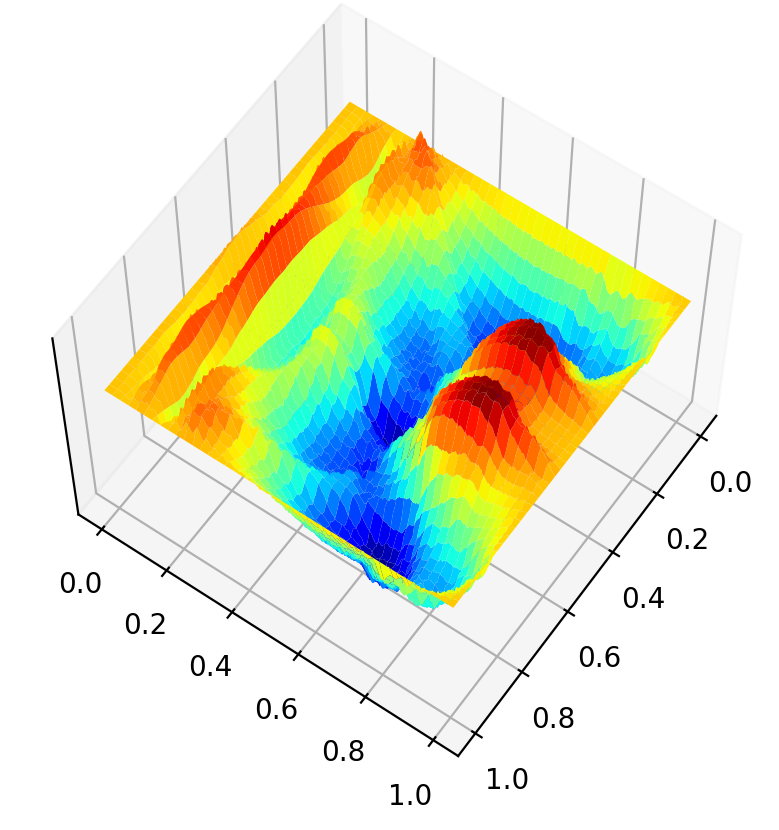

<Figure size 640x480 with 0 Axes>

In [9]:
{
 "metadata": {
  "execution": {
      "timeout": 800
  }
}
}
figura_3d = plt.figure()
figura_3d.set_dpi(200)
ax = figura_3d.add_subplot(1, 1, 1, projection="3d")

fig = plt.figure()
fig.set_dpi(100)

A = []
t = []

step = 2
t0 = 0
L = 1.0
Nt = int(nt / step)

for i in range(Nt):
  j = i * step
  value = w[:, :, j]
  t.append(t0)
  t0 += dt * step
  A.append(value)

k = 0

def animate3D(i):
  global k
  ax.clear()
  Z = A[k]
  k += 1
  ax.plot_surface(X, Y, Z, cmap =cm.jet, linewidth = 0, antialiased = True)
  ax.view_init(60, 35)
  ax.set_zticks([])

anim_2 = animation.FuncAnimation(figura_3d, animate3D, frames = Nt-2, interval = 20)
anim_2.save("wave2Dview3D.gif", dpi = 80, writer = "imagemagick")

We add in **[here](https://colab.research.google.com/drive/1Jh4jFH4hEWk1LWjbkHVgYOC2-bUb-8FM#scrollTo=pr1bI0DAjBer)** a link to a Google Colab that has a bit of interface and/or interaction with the user and allows you to modify the initial values ​​of the graphs or directly play with the code. We hope you really use it because that´s the way where you would be able to use it for the specific values of your problem. 

The documentation creators have tried various methods to include the animated gif for each of the 2D and 3D wave animations. Unfortunately, when the Jupyter Book is taken to the GitHub documentation, it doesn't work. The Colab link we added directs to the exact same information, but in a way that allows the user to edit it. Both animations will be there, and they will display correctly. Additionally, the code is written so that the animations can be downloaded to the local machine where you run this code or to the cloud, enabling you to have them in either case.

Have Fun!! :)))